## Library

In [1]:
import os
import math
import random

import numpy as np
import matplotlib.pyplot as plt

import squigglepy as sq
from squigglepy import bayes
from squigglepy.numbers import K, M, B, T

from copy import copy, deepcopy
from scipy import stats
from pprint import pprint
from datetime import datetime as dt
print('Loaded 1')

exec(open('utils.py').read())
print('Loaded 2')

exec(open('modules/tai_timelines.py').read())
print('Loaded TAI timelines module')


Loaded 1
Loaded 2
Loaded TAI timelines module


## Variables

In [2]:
# Global variables - probably don't want to change these but you could.
RUNS = 10000                                      # Number of runs to do (default 10000)
CURRENT_YEAR = 2023                               # What year to start the run on? (default: 2023)
MAX_YEAR = 2123                                   # What year to end the run on? (default: 2123)
years = list(range(CURRENT_YEAR, MAX_YEAR))
VARIABLE_SETS = {}


VARIABLE_SETS['Cotra2020'] = {
    'initial_gdp': 23*T,                  # GDP in `CURRENT_YEAR` of country that will develop TAI (default: 23 trillion)
    'algo_doubling_rate_max': 3.5,        # 90% CI, algorithms get twice as efficient every X years (maximum)
    'algo_doubling_rate_min': 2,          # 90% CI, algorithms get twice as efficient every X years (minimum)
    'min_reduction': 2,                   # 90% CI, the minimum amount of OOMs of reduction in TAI size algorithm improvements could acheive
    'max_reduction': 5,                   # 90% CI, the maximum amount of OOMs of reduction in TAI size algorithm improvements could acheive
    'initial_flop_per_dollar': 17.3,      # 90% CI, as of today, we can buy 10^X FLOP per $ (originally 17 for 2020)
    'flop_halving_rate': 2.5,             # 90% CI, the cost of FLOP per $ halves every X years
    'max_flop_per_dollar': 24,            # 90% CI, the cheapest FLOP will get is 10^X FLOPs per $
    'initial_pay': 9,                     # 90% CI, as of today the maximum we would pay for TAI is $10^X (originally 8.7 for 2020)
    'gdp_growth': 1.03,                   # 90% CI, GDP will increase by a factor of X each year
    'max_gdp_frac': 0.01,                 # 90% CI, the maximum % of GDP that would be spent on TAI is $10^X
    'spend_doubling_time': 2.5            # 90% CI, our willingness to spend on TAI doubles every X years
}


VARIABLE_SETS['Cotra2022'] = deepcopy(VARIABLE_SETS['Cotra2020'])
VARIABLE_SETS['Cotra2022']['initial_flop_per_dollar'] = 18.3 # (originally 18 for 2020)
print('Loaded')

Loaded


In [3]:
cotra_2020_tai_flop_size = sq.sample(load_cache_file='caches/cotra_2020')  # Cache generated in "Anchors" notebook
print('Cache from: {}'.format(dt.fromtimestamp(os.path.getmtime('caches/cotra_2020.sqcache.npy'))))

cotra_2020_tai_flop_size = [round(t, 1) for t in cotra_2020_tai_flop_size]
# 90% CI, it takes 10^X FLOP to run a transformative AI at inference.
# Note: A petaflop/s-day (pfs-day) consists of performing 10^15 neural net operations per second for one day, or a total of about 10^20 operations
VARIABLE_SETS['Cotra2020']['tai_flop_size'] = cotra_2020_tai_flop_size
sq.get_percentiles(cotra_2020_tai_flop_size)


Cache from: 2024-03-15 12:25:26.488882


{1: 25.999000000000002,
 5: 27.3,
 10: 28.4,
 20: 30.4,
 30: 32.1,
 40: 33.7,
 50: 35.3,
 60: 36.9,
 70: 38.9,
 80: 41.1,
 90: 45.2,
 95: 63.2,
 99: 67.9}

In [4]:
cotra_2022_tai_flop_size = sq.sample(load_cache_file='caches/cotra_2022')  # Cache generated in "Anchors" notebook
print('Cache from: {}'.format(dt.fromtimestamp(os.path.getmtime('caches/cotra_2022.sqcache.npy'))))
cotra_2022_tai_flop_size = [round(t, 1) for t in cotra_2022_tai_flop_size]
VARIABLE_SETS['Cotra2022']['tai_flop_size'] = cotra_2022_tai_flop_size
sq.get_percentiles(cotra_2022_tai_flop_size)

Cache from: 2024-03-15 12:26:09.476762


{1: 25.3,
 5: 26.6,
 10: 27.4,
 20: 28.6,
 30: 30.0,
 40: 31.5,
 50: 33.0,
 60: 34.6,
 70: 36.3,
 80: 38.6,
 90: 42.5,
 95: 60.7,
 99: 67.8}

## Run Cotra 2020

-
-
## SAMPLE RUN 1 ##
It takes 39.5 log FLOP (~3.2 million decillion) for transformative capabilities.
Every 2 years algorithms get 2x better, with 4 log reductions possible.
FLOP start at a cost of 17.3 log FLOP (~199.5 quadrillion) per 2023$USD. Every 2.5 years they get 2x cheaper, to a maximum of 24.0 log FLOP (~1.0 septillion) per 2023$USD.
We are initially willing to pay 9.0 log 2023$USD (~995.7 million). This doubles every 2.5 year to a max of 1.0% of GDP (initially ~230.0 billion 2023$USD). GDP grows at a rate of 1.03x per year.
---
Year: 2023 - 26.3 max log FLOP available - TAI takes 39.5 log FLOP - log 2023$USD 22.2 to buy TAI vs. willingness to pay log $ 9.0 - 17.3 log FLOP per $ (Total FLOP 26.3 vs. Effective 2023-logFLOP: 26.3)
Year: 2024 - 26.5 max log FLOP available - TAI takes 39.3 log FLOP - log 2023$USD 21.9 to buy TAI vs. willingness to pay log $ 9.1 - 17.4 log FLOP per $ (Total FLOP 26.5 vs. Effective 2023-logFLOP: 26.7)
Year: 2025 - 26.8 max log FLOP available - TA

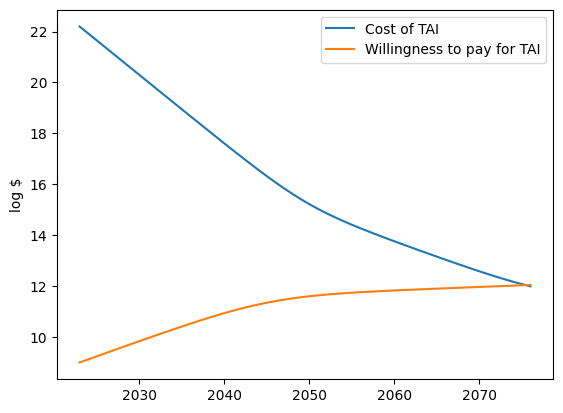

-
-
## SAMPLE RUN 2 ##
It takes 28.9 log FLOP (~79.4 octillion) for transformative capabilities.
Every 3.5 years algorithms get 2x better, with 2 log reductions possible.
FLOP start at a cost of 17.3 log FLOP (~199.5 quadrillion) per 2023$USD. Every 2.5 years they get 2x cheaper, to a maximum of 24.0 log FLOP (~1.0 septillion) per 2023$USD.
We are initially willing to pay 9.0 log 2023$USD (~995.7 million). This doubles every 2.5 year to a max of 1.0% of GDP (initially ~230.0 billion 2023$USD). GDP grows at a rate of 1.03x per year.
---
Year: 2023 - 26.3 max log FLOP available - TAI takes 28.9 log FLOP - log 2023$USD 11.6 to buy TAI vs. willingness to pay log $ 9.0 - 17.3 log FLOP per $ (Total FLOP 26.3 vs. Effective 2023-logFLOP: 26.3)
Year: 2024 - 26.5 max log FLOP available - TAI takes 28.8 log FLOP - log 2023$USD 11.4 to buy TAI vs. willingness to pay log $ 9.1 - 17.4 log FLOP per $ (Total FLOP 26.5 vs. Effective 2023-logFLOP: 26.6)
Year: 2025 - 26.8 max log FLOP available - TAI tak

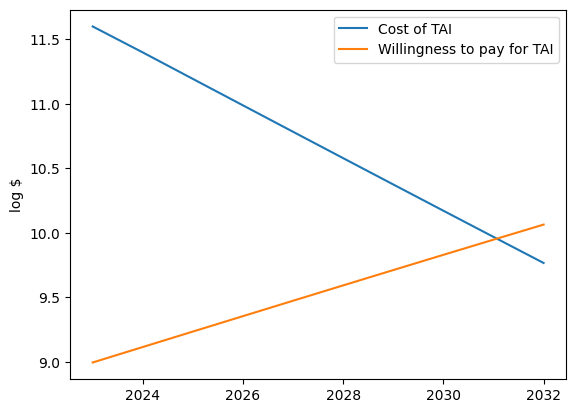

-
-
## SAMPLE RUN 3 ##
It takes 44.1 log FLOP (~125.9 billion decillion) for transformative capabilities.
Every 2 years algorithms get 2x better, with 5 log reductions possible.
FLOP start at a cost of 17.3 log FLOP (~199.5 quadrillion) per 2023$USD. Every 2.5 years they get 2x cheaper, to a maximum of 24.0 log FLOP (~1.0 septillion) per 2023$USD.
We are initially willing to pay 9.0 log 2023$USD (~995.7 million). This doubles every 2.5 year to a max of 1.0% of GDP (initially ~230.0 billion 2023$USD). GDP grows at a rate of 1.03x per year.
---
Year: 2023 - 26.3 max log FLOP available - TAI takes 44.1 log FLOP - log 2023$USD 26.8 to buy TAI vs. willingness to pay log $ 9.0 - 17.3 log FLOP per $ (Total FLOP 26.3 vs. Effective 2023-logFLOP: 26.3)
Year: 2024 - 26.5 max log FLOP available - TAI takes 43.9 log FLOP - log 2023$USD 26.5 to buy TAI vs. willingness to pay log $ 9.1 - 17.4 log FLOP per $ (Total FLOP 26.5 vs. Effective 2023-logFLOP: 26.7)
Year: 2025 - 26.8 max log FLOP available - 

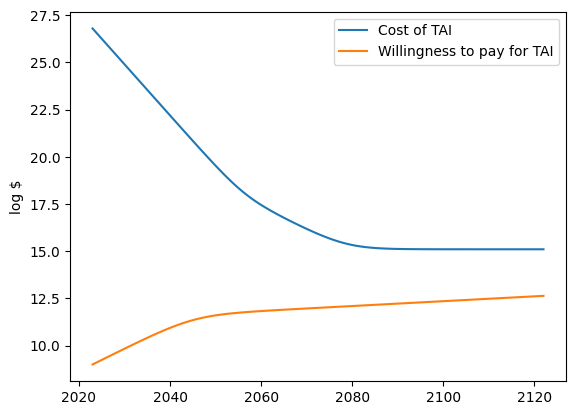

-
-
## RUN TIMELINES MODEL ##
Generating Bayes net with 5 cores...


100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 10000/10000 [00:07<00:00, 1356.04it/s]


Shuffling data...
Writing data...
Waiting for other cores...


100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 5/5 [00:00<00:00, 699.98it/s]

...Collected!
Caching in-memory...
...Cached!
...Reducing
...Reduced!
...All done!
-
## DISTRIBUTION OF TAI ARRIVAL DATE ##
['5%: 2027',
 '10%: 2029',
 '15%: 2032',
 '20%: 2035',
 '25%: 2038',
 '35%: 2045',
 '50%: 2050',
 '60%: 2061',
 '75%: 2091',
 '80%: >2123',
 '90%: >2123',
 '95%: >2123']
(Mean: 2066)
-
-
## DISTRIBUTION OF RELATIVE TAI ARRIVAL DATE ##
['5%: 4 years from now',
 '10%: 6 years from now',
 '15%: 9 years from now',
 '20%: 12 years from now',
 '25%: 15 years from now',
 '35%: 22 years from now',
 '50%: 27 years from now',
 '60%: 38 years from now',
 '75%: 68 years from now',
 '80%: >100 years from now',
 '90%: >100 years from now',
 '95%: >100 years from now']
(Mean: 43 years from now)
-
-
## TAI ARRIVAL DATE BY BIN ##
This year: 2.0%
2024-2025: 1.6%
2026-2027: 2.6%
2028-2029: 5.4%
2030-2034: 8.0%
2035-2039: 7.8%
2040-2049: 22.2%
2050-2059: 9.8%
2060-2069: 9.9%
2070-2079: 5.6%
2080-2089: 1.1%
2090-2099: 0.9%
2100-2109: 0.5%
2110-2119: 0.6%
>2120: 23.2%
-
-
## TAI ARRIVA

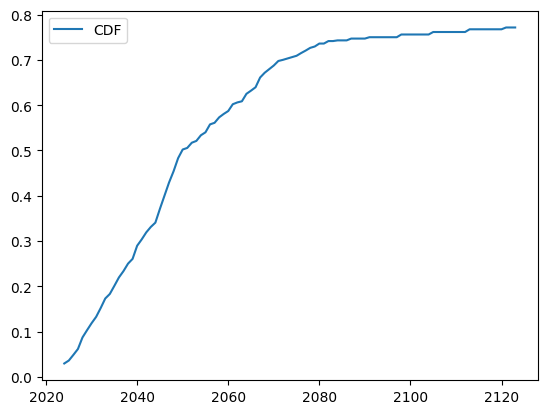

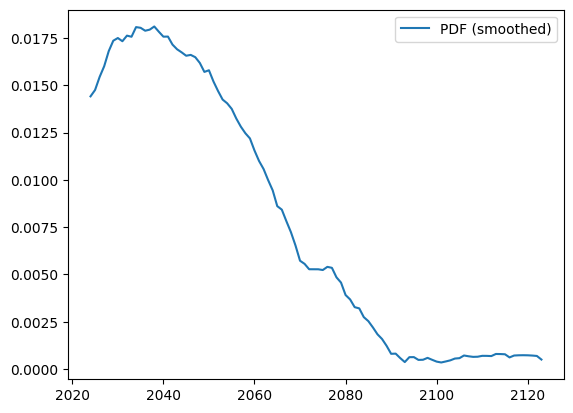

-
-
## TAI FLOP SIZE ##
{1: 26.1,
 5: 27.5,
 10: 28.7,
 20: 30.7,
 30: 32.5,
 40: 33.9,
 50: 35.5,
 60: 36.9,
 70: 38.6,
 80: 40.9,
 90: 44.8,
 95: 63.3,
 99: 67.5}
(Mean: 37.2)


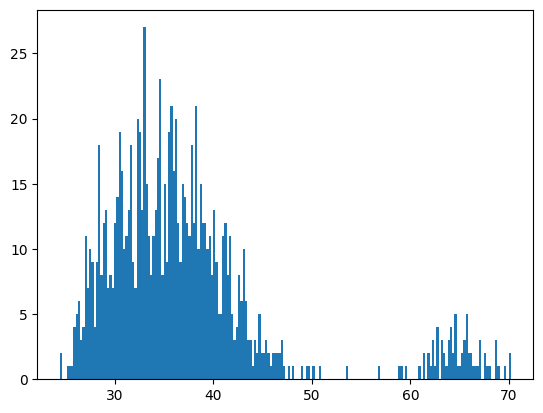

-
-
## MIN REDUCTION: 2 ##
-
## MAX REDUCTION: 5 ##
-
## MIN ALGO DOUBLING RATE: 2 ##
-
## MAX ALGO DOUBLING RATE: 3.5 ##
-
## INITIAL FLOP PER DOLLAR: 17.3 ##
-
## FLOP HALVING RATE: 2.5 ##
-
## MAX FLOP PER DOLLAR: 24 ##
-
## INITIAL PAY: 9 ##
-
## INITIAL GDP: 23000000000000 ##
-
## GDP GROWTH: 1.03 ##
-
## MAX GDP FRAC: 0.01 ##
-
## SPEND DOUBLING TIME: 2.5 ##
-
-
-
## GDP Over Time ##


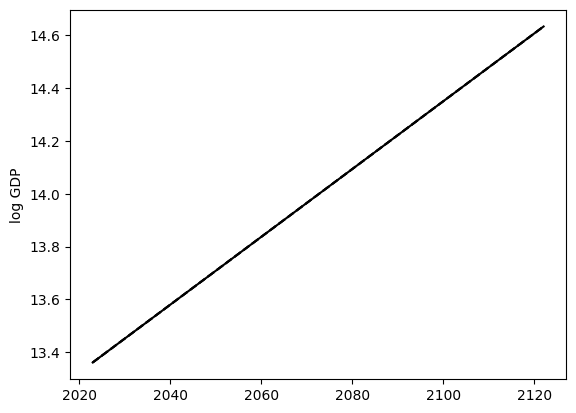

Year: 2023 - GDP log 2023$USD 13.4 (~23.0 trillion) 80% CI 13.4 (~23.0 trillion) - 13.4 (~23.0 trillion)
Year: 2024 - GDP log 2023$USD 13.4 (~23.7 trillion) 80% CI 13.4 (~23.7 trillion) - 13.4 (~23.7 trillion)
Year: 2025 - GDP log 2023$USD 13.4 (~24.4 trillion) 80% CI 13.4 (~24.4 trillion) - 13.4 (~24.4 trillion)
Year: 2026 - GDP log 2023$USD 13.4 (~25.1 trillion) 80% CI 13.4 (~25.1 trillion) - 13.4 (~25.1 trillion)
Year: 2027 - GDP log 2023$USD 13.4 (~25.9 trillion) 80% CI 13.4 (~25.9 trillion) - 13.4 (~25.9 trillion)
Year: 2028 - GDP log 2023$USD 13.4 (~26.7 trillion) 80% CI 13.4 (~26.7 trillion) - 13.4 (~26.7 trillion)
Year: 2029 - GDP log 2023$USD 13.4 (~27.5 trillion) 80% CI 13.4 (~27.5 trillion) - 13.4 (~27.5 trillion)
Year: 2030 - GDP log 2023$USD 13.5 (~28.3 trillion) 80% CI 13.5 (~28.3 trillion) - 13.5 (~28.3 trillion)
Year: 2031 - GDP log 2023$USD 13.5 (~29.1 trillion) 80% CI 13.5 (~29.1 trillion) - 13.5 (~29.1 trillion)
Year: 2032 - GDP log 2023$USD 13.5 (~30.0 trillion) 80%

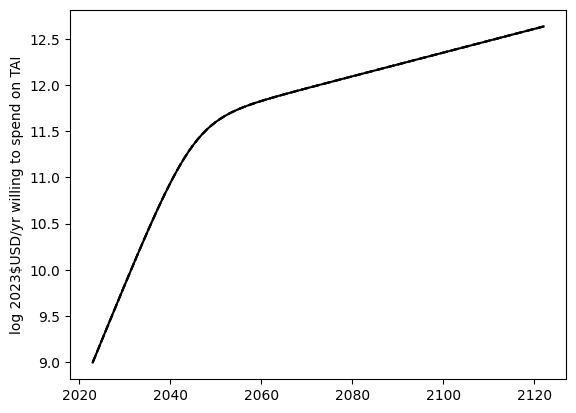

Year: 2023 - willingness log 2023$USD per year 9.0 (~995.7 million) 80% CI 9.0 (~995.7 million) - 9.0 (~995.7 million)
Year: 2024 - willingness log 2023$USD per year 9.1 (~1.3 billion) 80% CI 9.1 (~1.3 billion) - 9.1 (~1.3 billion)
Year: 2025 - willingness log 2023$USD per year 9.2 (~1.7 billion) 80% CI 9.2 (~1.7 billion) - 9.2 (~1.7 billion)
Year: 2026 - willingness log 2023$USD per year 9.4 (~2.3 billion) 80% CI 9.4 (~2.3 billion) - 9.4 (~2.3 billion)
Year: 2027 - willingness log 2023$USD per year 9.5 (~3.0 billion) 80% CI 9.5 (~3.0 billion) - 9.5 (~3.0 billion)
Year: 2028 - willingness log 2023$USD per year 9.6 (~3.9 billion) 80% CI 9.6 (~3.9 billion) - 9.6 (~3.9 billion)
Year: 2029 - willingness log 2023$USD per year 9.7 (~5.2 billion) 80% CI 9.7 (~5.2 billion) - 9.7 (~5.2 billion)
Year: 2030 - willingness log 2023$USD per year 9.8 (~6.8 billion) 80% CI 9.8 (~6.8 billion) - 9.8 (~6.8 billion)
Year: 2031 - willingness log 2023$USD per year 9.9 (~8.9 billion) 80% CI 9.9 (~8.9 billion

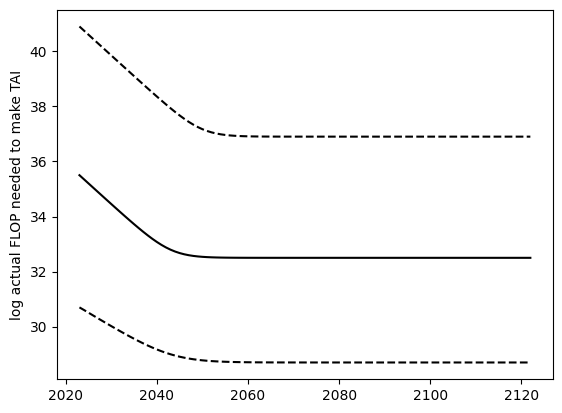

Year: 2023 - log FLOP needed for TAI 35.5 (~316.2 decillion) 80% CI 30.7 (~5.0 nonillion) - 40.9 (~79.4 million decillion)
Year: 2024 - log FLOP needed for TAI 35.4 (~223.9 decillion) 80% CI 30.6 (~4.0 nonillion) - 40.7 (~56.2 million decillion)
Year: 2025 - log FLOP needed for TAI 35.2 (~158.4 decillion) 80% CI 30.5 (~3.2 nonillion) - 40.6 (~39.7 million decillion)
Year: 2026 - log FLOP needed for TAI 35.0 (~112.1 decillion) 80% CI 30.4 (~2.6 nonillion) - 40.4 (~28.1 million decillion)
Year: 2027 - log FLOP needed for TAI 34.9 (~79.4 decillion) 80% CI 30.3 (~2.0 nonillion) - 40.3 (~19.9 million decillion)
Year: 2028 - log FLOP needed for TAI 34.7 (~56.2 decillion) 80% CI 30.2 (~1.6 nonillion) - 40.1 (~14.0 million decillion)
Year: 2029 - log FLOP needed for TAI 34.6 (~39.8 decillion) 80% CI 30.1 (~1.3 nonillion) - 40.0 (~9.9 million decillion)
Year: 2030 - log FLOP needed for TAI 34.5 (~28.3 decillion) 80% CI 30.0 (~1.0 nonillion) - 39.8 (~7.0 million decillion)
Year: 2031 - log FLOP 

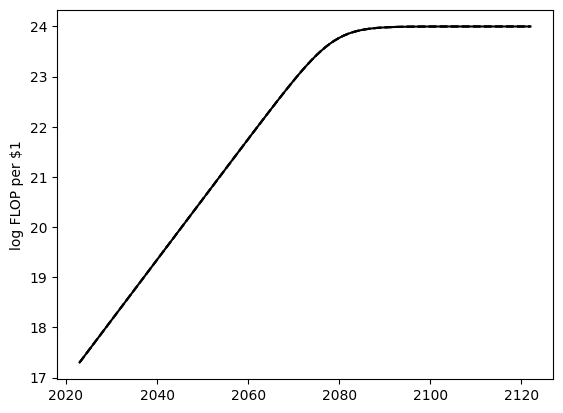

Year: 2023 - log FLOP per 2023$1USD 17.3 (~199.5 quadrillion) 80% CI 17.3 (~199.5 quadrillion) - 17.3 (~199.5 quadrillion)
Year: 2024 - log FLOP per 2023$1USD 17.4 (~263.3 quadrillion) 80% CI 17.4 (~263.3 quadrillion) - 17.4 (~263.3 quadrillion)
Year: 2025 - log FLOP per 2023$1USD 17.5 (~347.4 quadrillion) 80% CI 17.5 (~347.4 quadrillion) - 17.5 (~347.4 quadrillion)
Year: 2026 - log FLOP per 2023$1USD 17.7 (~458.4 quadrillion) 80% CI 17.7 (~458.4 quadrillion) - 17.7 (~458.4 quadrillion)
Year: 2027 - log FLOP per 2023$1USD 17.8 (~604.9 quadrillion) 80% CI 17.8 (~604.9 quadrillion) - 17.8 (~604.9 quadrillion)
Year: 2028 - log FLOP per 2023$1USD 17.9 (~798.1 quadrillion) 80% CI 17.9 (~798.1 quadrillion) - 17.9 (~798.1 quadrillion)
Year: 2029 - log FLOP per 2023$1USD 18.0 (~1.1 quintillion) 80% CI 18.0 (~1.1 quintillion) - 18.0 (~1.1 quintillion)
Year: 2030 - log FLOP per 2023$1USD 18.1 (~1.4 quintillion) 80% CI 18.1 (~1.4 quintillion) - 18.1 (~1.4 quintillion)
Year: 2031 - log FLOP per 20

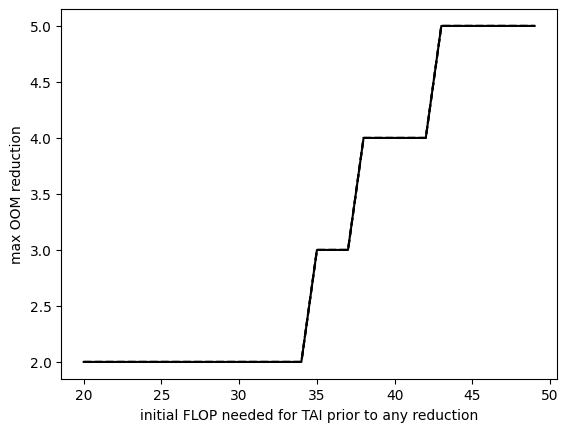

TAI log FLOP 20 -> 2.0 OOM reductions possible (80% CI: 2.0 to 2.0)
TAI log FLOP 21 -> 2.0 OOM reductions possible (80% CI: 2.0 to 2.0)
TAI log FLOP 22 -> 2.0 OOM reductions possible (80% CI: 2.0 to 2.0)
TAI log FLOP 23 -> 2.0 OOM reductions possible (80% CI: 2.0 to 2.0)
TAI log FLOP 24 -> 2.0 OOM reductions possible (80% CI: 2.0 to 2.0)
TAI log FLOP 25 -> 2.0 OOM reductions possible (80% CI: 2.0 to 2.0)
TAI log FLOP 26 -> 2.0 OOM reductions possible (80% CI: 2.0 to 2.0)
TAI log FLOP 27 -> 2.0 OOM reductions possible (80% CI: 2.0 to 2.0)
TAI log FLOP 28 -> 2.0 OOM reductions possible (80% CI: 2.0 to 2.0)
TAI log FLOP 29 -> 2.0 OOM reductions possible (80% CI: 2.0 to 2.0)
TAI log FLOP 30 -> 2.0 OOM reductions possible (80% CI: 2.0 to 2.0)
TAI log FLOP 31 -> 2.0 OOM reductions possible (80% CI: 2.0 to 2.0)
TAI log FLOP 32 -> 2.0 OOM reductions possible (80% CI: 2.0 to 2.0)
TAI log FLOP 33 -> 2.0 OOM reductions possible (80% CI: 2.0 to 2.0)
TAI log FLOP 34 -> 2.0 OOM reductions possible (

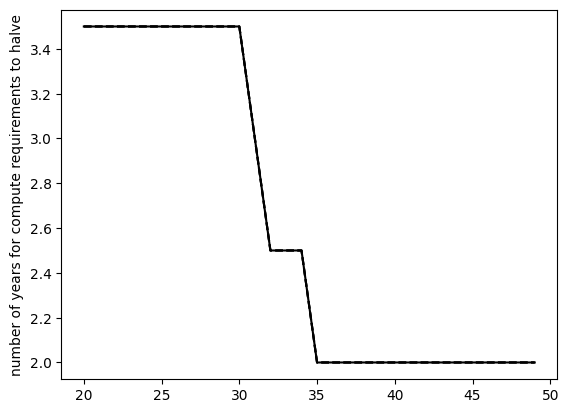

TAI log FLOP 20 -> algo doubling rate 3.5yrs (80% CI: 3.5 to 3.5)
TAI log FLOP 21 -> algo doubling rate 3.5yrs (80% CI: 3.5 to 3.5)
TAI log FLOP 22 -> algo doubling rate 3.5yrs (80% CI: 3.5 to 3.5)
TAI log FLOP 23 -> algo doubling rate 3.5yrs (80% CI: 3.5 to 3.5)
TAI log FLOP 24 -> algo doubling rate 3.5yrs (80% CI: 3.5 to 3.5)
TAI log FLOP 25 -> algo doubling rate 3.5yrs (80% CI: 3.5 to 3.5)
TAI log FLOP 26 -> algo doubling rate 3.5yrs (80% CI: 3.5 to 3.5)
TAI log FLOP 27 -> algo doubling rate 3.5yrs (80% CI: 3.5 to 3.5)
TAI log FLOP 28 -> algo doubling rate 3.5yrs (80% CI: 3.5 to 3.5)
TAI log FLOP 29 -> algo doubling rate 3.5yrs (80% CI: 3.5 to 3.5)
TAI log FLOP 30 -> algo doubling rate 3.5yrs (80% CI: 3.5 to 3.5)
TAI log FLOP 31 -> algo doubling rate 3.0yrs (80% CI: 3.0 to 3.0)
TAI log FLOP 32 -> algo doubling rate 2.5yrs (80% CI: 2.5 to 2.5)
TAI log FLOP 33 -> algo doubling rate 2.5yrs (80% CI: 2.5 to 2.5)
TAI log FLOP 34 -> algo doubling rate 2.5yrs (80% CI: 2.5 to 2.5)
TAI log FL

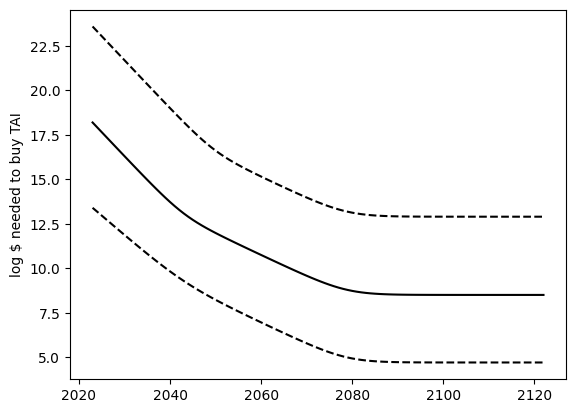

Year: 2023 - 18.2 log 2023$USD to buy TAI (~1.6 quintillion) 80% CI 13.4 (~25.1 trillion) - 23.6 (~398.1 sextillion)
Year: 2024 - 17.9 log 2023$USD to buy TAI (~850.5 quadrillion) 80% CI 13.2 (~15.3 trillion) - 23.3 (~213.4 sextillion)
Year: 2025 - 17.7 log 2023$USD to buy TAI (~456.1 quadrillion) 80% CI 13.0 (~9.2 trillion) - 23.1 (~114.3 sextillion)
Year: 2026 - 17.4 log 2023$USD to buy TAI (~244.6 quadrillion) 80% CI 12.7 (~5.6 trillion) - 22.8 (~61.3 sextillion)
Year: 2027 - 17.1 log 2023$USD to buy TAI (~131.2 quadrillion) 80% CI 12.5 (~3.4 trillion) - 22.5 (~32.8 sextillion)
Year: 2028 - 16.8 log 2023$USD to buy TAI (~70.4 quadrillion) 80% CI 12.3 (~2.0 trillion) - 22.2 (~17.6 sextillion)
Year: 2029 - 16.6 log 2023$USD to buy TAI (~37.8 quadrillion) 80% CI 12.1 (~1.2 trillion) - 22.0 (~9.4 sextillion)
Year: 2030 - 16.3 log 2023$USD to buy TAI (~20.3 quadrillion) 80% CI 11.9 (~751.7 billion) - 21.7 (~5.1 sextillion)
Year: 2031 - 16.0 log 2023$USD to buy TAI (~11.0 quadrillion) 80%

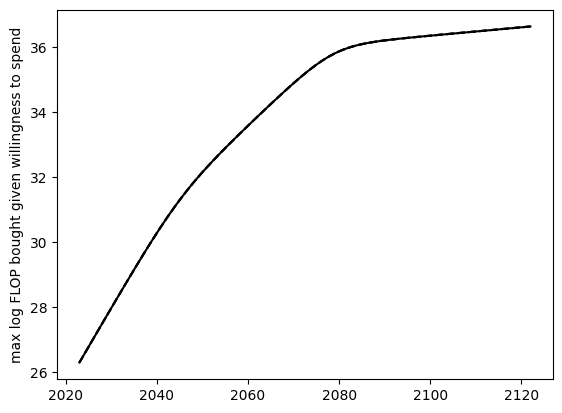

Year: 2023 - max log FLOP 26.3 (~198.7 septillion) 80% CI 26.3 (~198.7 septillion) - 26.3 (~198.7 septillion)
Year: 2024 - max log FLOP 26.5 (~345.5 septillion) 80% CI 26.5 (~345.5 septillion) - 26.5 (~345.5 septillion)
Year: 2025 - max log FLOP 26.8 (~600.6 septillion) 80% CI 26.8 (~600.6 septillion) - 26.8 (~600.6 septillion)
Year: 2026 - max log FLOP 27.0 (~1.0 octillion) 80% CI 27.0 (~1.0 octillion) - 27.0 (~1.0 octillion)
Year: 2027 - max log FLOP 27.3 (~1.8 octillion) 80% CI 27.3 (~1.8 octillion) - 27.3 (~1.8 octillion)
Year: 2028 - max log FLOP 27.5 (~3.1 octillion) 80% CI 27.5 (~3.1 octillion) - 27.5 (~3.1 octillion)
Year: 2029 - max log FLOP 27.7 (~5.5 octillion) 80% CI 27.7 (~5.5 octillion) - 27.7 (~5.5 octillion)
Year: 2030 - max log FLOP 28.0 (~9.4 octillion) 80% CI 28.0 (~9.4 octillion) - 28.0 (~9.4 octillion)
Year: 2031 - max log FLOP 28.2 (~16.3 octillion) 80% CI 28.2 (~16.3 octillion) - 28.2 (~16.3 octillion)
Year: 2032 - max log FLOP 28.5 (~28.2 octillion) 80% CI 28.5 

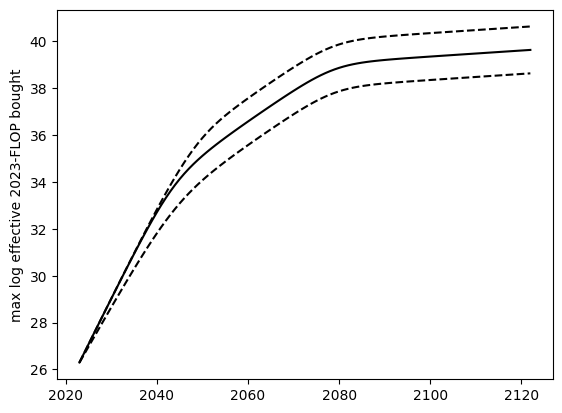

Year: 2023 - max log effective 2023-FLOP 26.3 (~198.7 septillion) 80% CI 26.3 (~198.7 septillion) - 26.3 (~198.7 septillion)
Year: 2024 - max log effective 2023-FLOP 26.7 (~487.9 septillion) 80% CI 26.6 (~429.9 septillion) - 26.7 (~488.5 septillion)
Year: 2025 - max log effective 2023-FLOP 27.1 (~1.2 octillion) 80% CI 27.0 (~938.4 septillion) - 27.1 (~1.2 octillion)
Year: 2026 - max log effective 2023-FLOP 27.5 (~2.9 octillion) 80% CI 27.3 (~2.0 octillion) - 27.5 (~3.0 octillion)
Year: 2027 - max log effective 2023-FLOP 27.9 (~7.2 octillion) 80% CI 27.6 (~4.5 octillion) - 27.9 (~7.2 octillion)
Year: 2028 - max log effective 2023-FLOP 28.2 (~17.7 octillion) 80% CI 28.0 (~9.7 octillion) - 28.2 (~17.8 octillion)
Year: 2029 - max log effective 2023-FLOP 28.6 (~43.3 octillion) 80% CI 28.3 (~21.0 octillion) - 28.6 (~43.6 octillion)
Year: 2030 - max log effective 2023-FLOP 29.0 (~105.7 octillion) 80% CI 28.7 (~45.3 octillion) - 29.0 (~106.7 octillion)
Year: 2031 - max log effective 2023-FLOP 

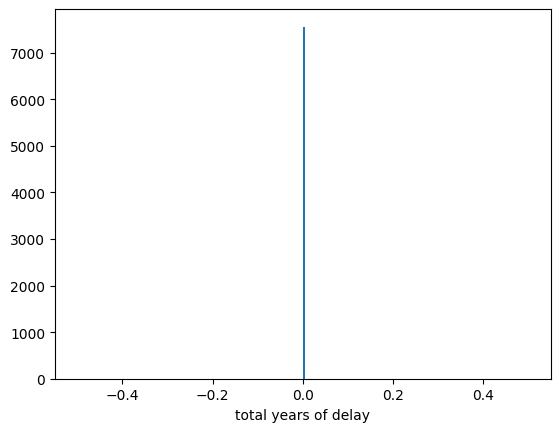

In [5]:
variables = VARIABLE_SETS['Cotra2020']
variables['RUNS'] = RUNS
variables['CURRENT_YEAR'] = CURRENT_YEAR
variables['MAX_YEAR'] = MAX_YEAR
run_timelines_model(variables, cores=5, runs=variables['RUNS'])

## Run Cotra 2022

-
-
## SAMPLE RUN 1 ##
It takes 28.4 log FLOP (~25.1 octillion) for transformative capabilities.
Every 3.5 years algorithms get 2x better, with 2 log reductions possible.
FLOP start at a cost of 18.3 log FLOP (~2.0 quintillion) per 2023$USD. Every 2.5 years they get 2x cheaper, to a maximum of 24.0 log FLOP (~1.0 septillion) per 2023$USD.
We are initially willing to pay 9.0 log 2023$USD (~995.7 million). This doubles every 2.5 year to a max of 1.0% of GDP (initially ~230.0 billion 2023$USD). GDP grows at a rate of 1.03x per year.
---
Year: 2023 - 27.3 max log FLOP available - TAI takes 28.4 log FLOP - log 2023$USD 10.1 to buy TAI vs. willingness to pay log $ 9.0 - 18.3 log FLOP per $ (Total FLOP 27.3 vs. Effective 2023-logFLOP: 27.3)
Year: 2024 - 27.5 max log FLOP available - TAI takes 28.3 log FLOP - log 2023$USD 9.9 to buy TAI vs. willingness to pay log $ 9.1 - 18.4 log FLOP per $ (Total FLOP 27.5 vs. Effective 2023-logFLOP: 27.6)
Year: 2025 - 27.8 max log FLOP available - TAI takes 

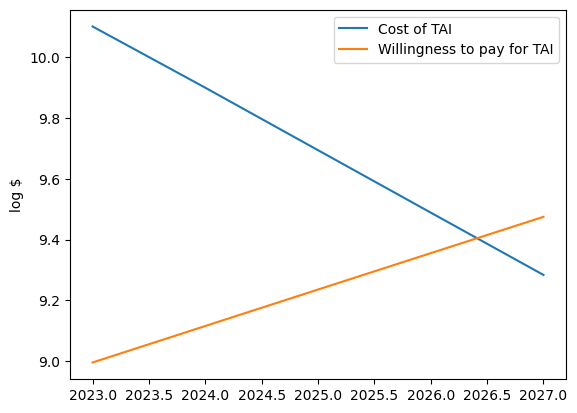

-
-
## SAMPLE RUN 2 ##
It takes 64.7 log FLOP (~50.1 nonillion decillion) for transformative capabilities.
Every 2 years algorithms get 2x better, with 5 log reductions possible.
FLOP start at a cost of 18.3 log FLOP (~2.0 quintillion) per 2023$USD. Every 2.5 years they get 2x cheaper, to a maximum of 24.0 log FLOP (~1.0 septillion) per 2023$USD.
We are initially willing to pay 9.0 log 2023$USD (~995.7 million). This doubles every 2.5 year to a max of 1.0% of GDP (initially ~230.0 billion 2023$USD). GDP grows at a rate of 1.03x per year.
---
Year: 2023 - 27.3 max log FLOP available - TAI takes 64.7 log FLOP - log 2023$USD 46.4 to buy TAI vs. willingness to pay log $ 9.0 - 18.3 log FLOP per $ (Total FLOP 27.3 vs. Effective 2023-logFLOP: 27.3)
Year: 2024 - 27.5 max log FLOP available - TAI takes 64.5 log FLOP - log 2023$USD 46.1 to buy TAI vs. willingness to pay log $ 9.1 - 18.4 log FLOP per $ (Total FLOP 27.5 vs. Effective 2023-logFLOP: 27.7)
Year: 2025 - 27.8 max log FLOP available - T

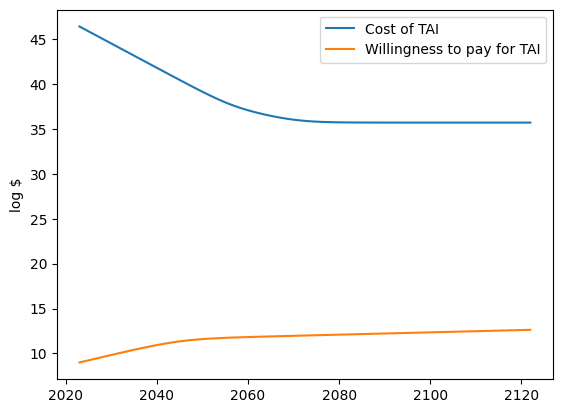

-
-
## SAMPLE RUN 3 ##
It takes 30.4 log FLOP (~2.5 nonillion) for transformative capabilities.
Every 3.0 years algorithms get 2x better, with 2 log reductions possible.
FLOP start at a cost of 18.3 log FLOP (~2.0 quintillion) per 2023$USD. Every 2.5 years they get 2x cheaper, to a maximum of 24.0 log FLOP (~1.0 septillion) per 2023$USD.
We are initially willing to pay 9.0 log 2023$USD (~995.7 million). This doubles every 2.5 year to a max of 1.0% of GDP (initially ~230.0 billion 2023$USD). GDP grows at a rate of 1.03x per year.
---
Year: 2023 - 27.3 max log FLOP available - TAI takes 30.4 log FLOP - log 2023$USD 12.1 to buy TAI vs. willingness to pay log $ 9.0 - 18.3 log FLOP per $ (Total FLOP 27.3 vs. Effective 2023-logFLOP: 27.3)
Year: 2024 - 27.5 max log FLOP available - TAI takes 30.3 log FLOP - log 2023$USD 11.9 to buy TAI vs. willingness to pay log $ 9.1 - 18.4 log FLOP per $ (Total FLOP 27.5 vs. Effective 2023-logFLOP: 27.6)
Year: 2025 - 27.8 max log FLOP available - TAI takes 

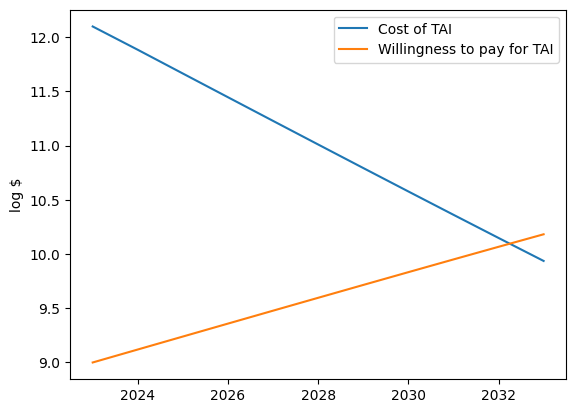

-
-
## RUN TIMELINES MODEL ##
Generating Bayes net with 5 cores...


100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 10000/10000 [00:07<00:00, 1408.82it/s]


Shuffling data...
Writing data...
Waiting for other cores...


100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 5/5 [00:00<00:00, 699.19it/s]

...Collected!
Caching in-memory...
...Cached!
...Reducing
...Reduced!
...All done!
-
## DISTRIBUTION OF TAI ARRIVAL DATE ##
['5%: 2023',
 '10%: 2024',
 '15%: 2026',
 '20%: 2028',
 '25%: 2030',
 '35%: 2035',
 '50%: 2042',
 '60%: 2045',
 '75%: 2059',
 '80%: 2062',
 '90%: >2123',
 '95%: >2123']
(Mean: 2052)
-
-
## DISTRIBUTION OF RELATIVE TAI ARRIVAL DATE ##
['5%: 0 years from now',
 '10%: 1 years from now',
 '15%: 3 years from now',
 '20%: 5 years from now',
 '25%: 7 years from now',
 '35%: 12 years from now',
 '50%: 19 years from now',
 '60%: 22 years from now',
 '75%: 36 years from now',
 '80%: 39 years from now',
 '90%: >100 years from now',
 '95%: >100 years from now']
(Mean: 29 years from now)
-
-
## TAI ARRIVAL DATE BY BIN ##
This year: 8.4%
2024-2025: 6.0%
2026-2027: 4.1%
2028-2029: 6.8%
2030-2034: 10.8%
2035-2039: 11.8%
2040-2049: 20.4%
2050-2059: 9.5%
2060-2069: 6.6%
2070-2079: 1.7%
2080-2089: 0.8%
2090-2099: 0.4%
2100-2109: 0.3%
2110-2119: 0.2%
>2120: 13.6%
-
-
## TAI ARRIVAL D

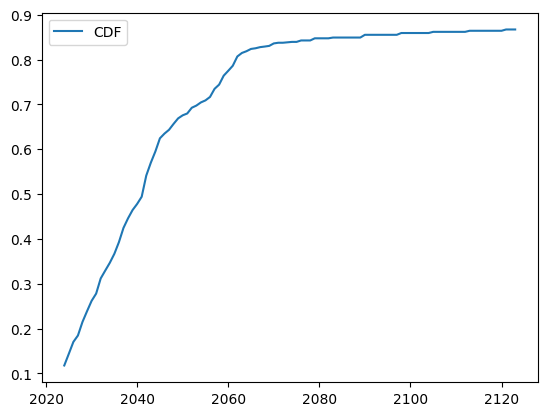

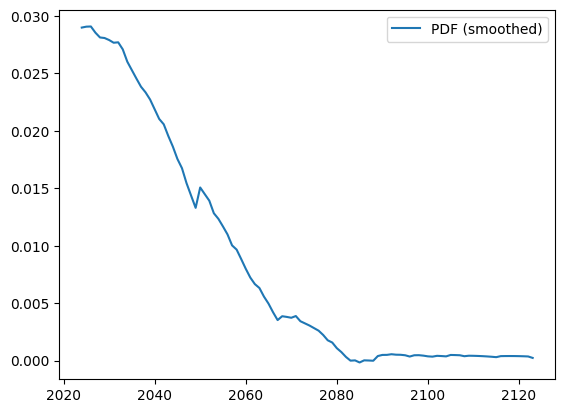

-
-
## TAI FLOP SIZE ##
{1: 24.9,
 5: 26.6,
 10: 27.5,
 20: 28.8,
 30: 30.4,
 40: 31.7,
 50: 33.2,
 60: 34.5,
 70: 36.2,
 80: 38.2,
 90: 41.6,
 95: 44.8,
 99: 66.7}
(Mean: 34.6)


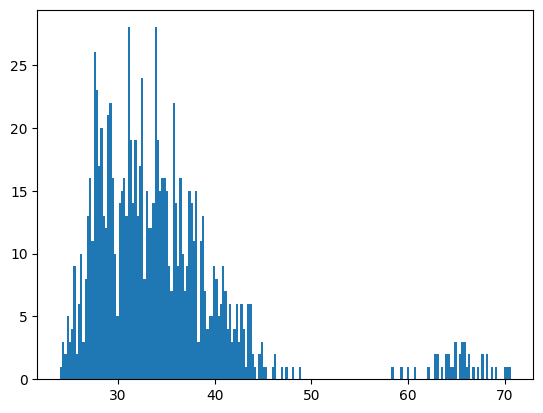

-
-
## MIN REDUCTION: 2 ##
-
## MAX REDUCTION: 5 ##
-
## MIN ALGO DOUBLING RATE: 2 ##
-
## MAX ALGO DOUBLING RATE: 3.5 ##
-
## INITIAL FLOP PER DOLLAR: 18.3 ##
-
## FLOP HALVING RATE: 2.5 ##
-
## MAX FLOP PER DOLLAR: 24 ##
-
## INITIAL PAY: 9 ##
-
## INITIAL GDP: 23000000000000 ##
-
## GDP GROWTH: 1.03 ##
-
## MAX GDP FRAC: 0.01 ##
-
## SPEND DOUBLING TIME: 2.5 ##
-
-
-
## GDP Over Time ##


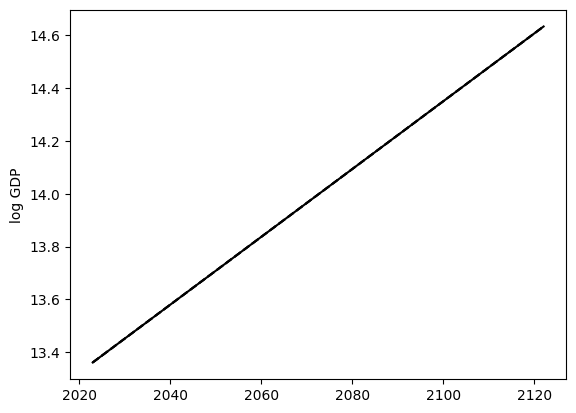

Year: 2023 - GDP log 2023$USD 13.4 (~23.0 trillion) 80% CI 13.4 (~23.0 trillion) - 13.4 (~23.0 trillion)
Year: 2024 - GDP log 2023$USD 13.4 (~23.7 trillion) 80% CI 13.4 (~23.7 trillion) - 13.4 (~23.7 trillion)
Year: 2025 - GDP log 2023$USD 13.4 (~24.4 trillion) 80% CI 13.4 (~24.4 trillion) - 13.4 (~24.4 trillion)
Year: 2026 - GDP log 2023$USD 13.4 (~25.1 trillion) 80% CI 13.4 (~25.1 trillion) - 13.4 (~25.1 trillion)
Year: 2027 - GDP log 2023$USD 13.4 (~25.9 trillion) 80% CI 13.4 (~25.9 trillion) - 13.4 (~25.9 trillion)
Year: 2028 - GDP log 2023$USD 13.4 (~26.7 trillion) 80% CI 13.4 (~26.7 trillion) - 13.4 (~26.7 trillion)
Year: 2029 - GDP log 2023$USD 13.4 (~27.5 trillion) 80% CI 13.4 (~27.5 trillion) - 13.4 (~27.5 trillion)
Year: 2030 - GDP log 2023$USD 13.5 (~28.3 trillion) 80% CI 13.5 (~28.3 trillion) - 13.5 (~28.3 trillion)
Year: 2031 - GDP log 2023$USD 13.5 (~29.1 trillion) 80% CI 13.5 (~29.1 trillion) - 13.5 (~29.1 trillion)
Year: 2032 - GDP log 2023$USD 13.5 (~30.0 trillion) 80%

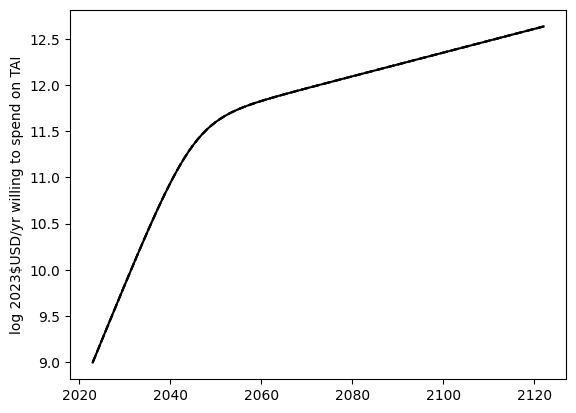

Year: 2023 - willingness log 2023$USD per year 9.0 (~995.7 million) 80% CI 9.0 (~995.7 million) - 9.0 (~995.7 million)
Year: 2024 - willingness log 2023$USD per year 9.1 (~1.3 billion) 80% CI 9.1 (~1.3 billion) - 9.1 (~1.3 billion)
Year: 2025 - willingness log 2023$USD per year 9.2 (~1.7 billion) 80% CI 9.2 (~1.7 billion) - 9.2 (~1.7 billion)
Year: 2026 - willingness log 2023$USD per year 9.4 (~2.3 billion) 80% CI 9.4 (~2.3 billion) - 9.4 (~2.3 billion)
Year: 2027 - willingness log 2023$USD per year 9.5 (~3.0 billion) 80% CI 9.5 (~3.0 billion) - 9.5 (~3.0 billion)
Year: 2028 - willingness log 2023$USD per year 9.6 (~3.9 billion) 80% CI 9.6 (~3.9 billion) - 9.6 (~3.9 billion)
Year: 2029 - willingness log 2023$USD per year 9.7 (~5.2 billion) 80% CI 9.7 (~5.2 billion) - 9.7 (~5.2 billion)
Year: 2030 - willingness log 2023$USD per year 9.8 (~6.8 billion) 80% CI 9.8 (~6.8 billion) - 9.8 (~6.8 billion)
Year: 2031 - willingness log 2023$USD per year 9.9 (~8.9 billion) 80% CI 9.9 (~8.9 billion

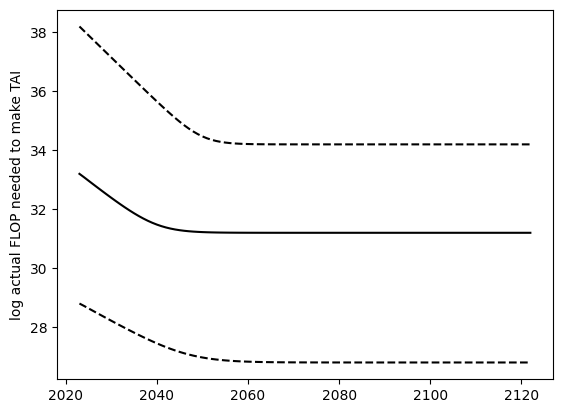

Year: 2023 - log FLOP needed for TAI 33.2 (~1.6 decillion) 80% CI 28.8 (~63.1 octillion) - 38.2 (~158.5 thousand decillion)
Year: 2024 - log FLOP needed for TAI 33.1 (~1.2 decillion) 80% CI 28.7 (~52.4 octillion) - 38.0 (~112.1 thousand decillion)
Year: 2025 - log FLOP needed for TAI 33.0 (~926.1 nonillion) 80% CI 28.6 (~43.1 octillion) - 37.9 (~79.3 thousand decillion)
Year: 2026 - log FLOP needed for TAI 32.8 (~705.7 nonillion) 80% CI 28.5 (~35.5 octillion) - 37.7 (~56.1 thousand decillion)
Year: 2027 - log FLOP needed for TAI 32.7 (~538.7 nonillion) 80% CI 28.5 (~29.2 octillion) - 37.6 (~39.6 thousand decillion)
Year: 2028 - log FLOP needed for TAI 32.6 (~412.1 nonillion) 80% CI 28.4 (~24.1 octillion) - 37.4 (~28.0 thousand decillion)
Year: 2029 - log FLOP needed for TAI 32.5 (~316.1 nonillion) 80% CI 28.3 (~19.9 octillion) - 37.3 (~19.8 thousand decillion)
Year: 2030 - log FLOP needed for TAI 32.4 (~243.4 nonillion) 80% CI 28.2 (~16.4 octillion) - 37.1 (~14.0 thousand decillion)
Ye

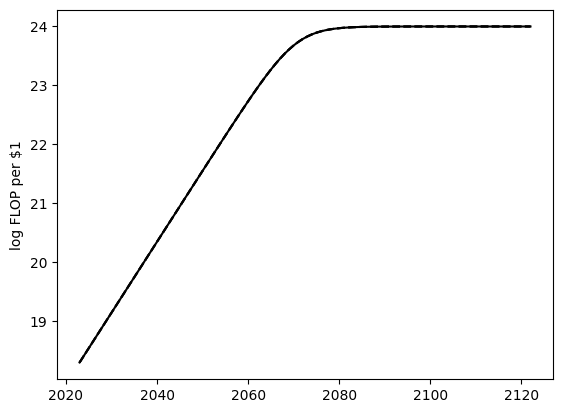

Year: 2023 - log FLOP per 2023$1USD 18.3 (~2.0 quintillion) 80% CI 18.3 (~2.0 quintillion) - 18.3 (~2.0 quintillion)
Year: 2024 - log FLOP per 2023$1USD 18.4 (~2.6 quintillion) 80% CI 18.4 (~2.6 quintillion) - 18.4 (~2.6 quintillion)
Year: 2025 - log FLOP per 2023$1USD 18.5 (~3.5 quintillion) 80% CI 18.5 (~3.5 quintillion) - 18.5 (~3.5 quintillion)
Year: 2026 - log FLOP per 2023$1USD 18.7 (~4.6 quintillion) 80% CI 18.7 (~4.6 quintillion) - 18.7 (~4.6 quintillion)
Year: 2027 - log FLOP per 2023$1USD 18.8 (~6.0 quintillion) 80% CI 18.8 (~6.0 quintillion) - 18.8 (~6.0 quintillion)
Year: 2028 - log FLOP per 2023$1USD 18.9 (~8.0 quintillion) 80% CI 18.9 (~8.0 quintillion) - 18.9 (~8.0 quintillion)
Year: 2029 - log FLOP per 2023$1USD 19.0 (~10.5 quintillion) 80% CI 19.0 (~10.5 quintillion) - 19.0 (~10.5 quintillion)
Year: 2030 - log FLOP per 2023$1USD 19.1 (~13.9 quintillion) 80% CI 19.1 (~13.9 quintillion) - 19.1 (~13.9 quintillion)
Year: 2031 - log FLOP per 2023$1USD 19.3 (~18.3 quintillio

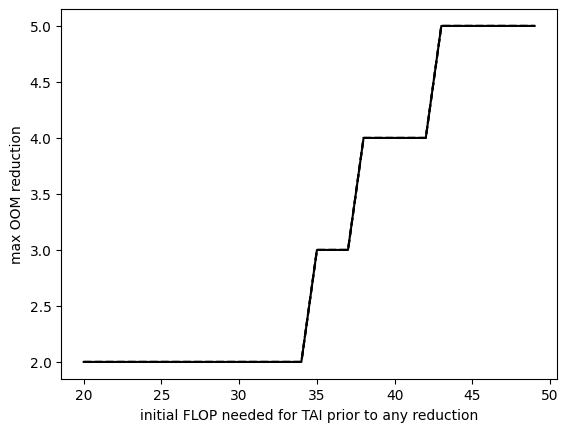

TAI log FLOP 20 -> 2.0 OOM reductions possible (80% CI: 2.0 to 2.0)
TAI log FLOP 21 -> 2.0 OOM reductions possible (80% CI: 2.0 to 2.0)
TAI log FLOP 22 -> 2.0 OOM reductions possible (80% CI: 2.0 to 2.0)
TAI log FLOP 23 -> 2.0 OOM reductions possible (80% CI: 2.0 to 2.0)
TAI log FLOP 24 -> 2.0 OOM reductions possible (80% CI: 2.0 to 2.0)
TAI log FLOP 25 -> 2.0 OOM reductions possible (80% CI: 2.0 to 2.0)
TAI log FLOP 26 -> 2.0 OOM reductions possible (80% CI: 2.0 to 2.0)
TAI log FLOP 27 -> 2.0 OOM reductions possible (80% CI: 2.0 to 2.0)
TAI log FLOP 28 -> 2.0 OOM reductions possible (80% CI: 2.0 to 2.0)
TAI log FLOP 29 -> 2.0 OOM reductions possible (80% CI: 2.0 to 2.0)
TAI log FLOP 30 -> 2.0 OOM reductions possible (80% CI: 2.0 to 2.0)
TAI log FLOP 31 -> 2.0 OOM reductions possible (80% CI: 2.0 to 2.0)
TAI log FLOP 32 -> 2.0 OOM reductions possible (80% CI: 2.0 to 2.0)
TAI log FLOP 33 -> 2.0 OOM reductions possible (80% CI: 2.0 to 2.0)
TAI log FLOP 34 -> 2.0 OOM reductions possible (

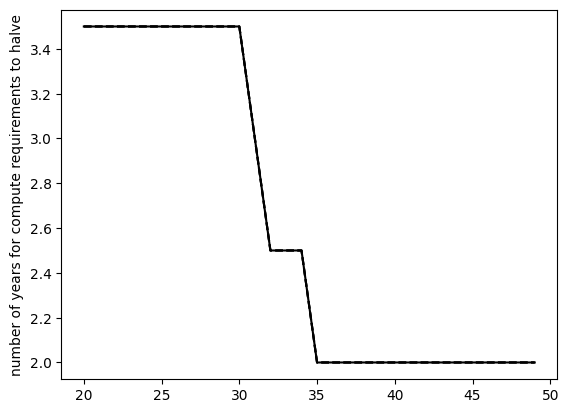

TAI log FLOP 20 -> algo doubling rate 3.5yrs (80% CI: 3.5 to 3.5)
TAI log FLOP 21 -> algo doubling rate 3.5yrs (80% CI: 3.5 to 3.5)
TAI log FLOP 22 -> algo doubling rate 3.5yrs (80% CI: 3.5 to 3.5)
TAI log FLOP 23 -> algo doubling rate 3.5yrs (80% CI: 3.5 to 3.5)
TAI log FLOP 24 -> algo doubling rate 3.5yrs (80% CI: 3.5 to 3.5)
TAI log FLOP 25 -> algo doubling rate 3.5yrs (80% CI: 3.5 to 3.5)
TAI log FLOP 26 -> algo doubling rate 3.5yrs (80% CI: 3.5 to 3.5)
TAI log FLOP 27 -> algo doubling rate 3.5yrs (80% CI: 3.5 to 3.5)
TAI log FLOP 28 -> algo doubling rate 3.5yrs (80% CI: 3.5 to 3.5)
TAI log FLOP 29 -> algo doubling rate 3.5yrs (80% CI: 3.5 to 3.5)
TAI log FLOP 30 -> algo doubling rate 3.5yrs (80% CI: 3.5 to 3.5)
TAI log FLOP 31 -> algo doubling rate 3.0yrs (80% CI: 3.0 to 3.0)
TAI log FLOP 32 -> algo doubling rate 2.5yrs (80% CI: 2.5 to 2.5)
TAI log FLOP 33 -> algo doubling rate 2.5yrs (80% CI: 2.5 to 2.5)
TAI log FLOP 34 -> algo doubling rate 2.5yrs (80% CI: 2.5 to 2.5)
TAI log FL

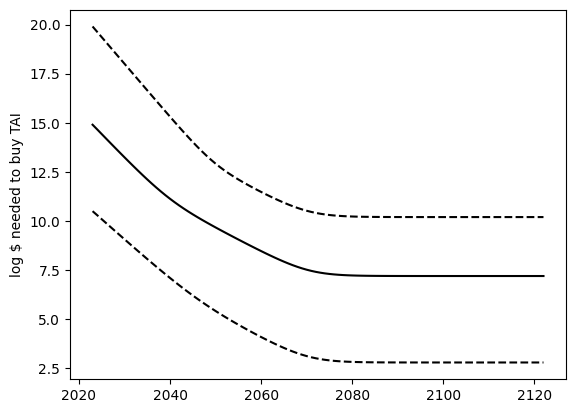

Year: 2023 - 14.9 log 2023$USD to buy TAI (~794.3 trillion) 80% CI 10.5 (~31.6 billion) - 19.9 (~79.4 quintillion)
Year: 2024 - 14.7 log 2023$USD to buy TAI (~462.2 trillion) 80% CI 10.3 (~19.9 billion) - 19.6 (~42.6 quintillion)
Year: 2025 - 14.4 log 2023$USD to buy TAI (~266.6 trillion) 80% CI 10.1 (~12.4 billion) - 19.4 (~22.8 quintillion)
Year: 2026 - 14.2 log 2023$USD to buy TAI (~154.0 trillion) 80% CI 9.9 (~7.7 billion) - 19.1 (~12.2 quintillion)
Year: 2027 - 13.9 log 2023$USD to buy TAI (~89.1 trillion) 80% CI 9.7 (~4.8 billion) - 18.8 (~6.6 quintillion)
Year: 2028 - 13.7 log 2023$USD to buy TAI (~51.6 trillion) 80% CI 9.5 (~3.0 billion) - 18.5 (~3.5 quintillion)
Year: 2029 - 13.5 log 2023$USD to buy TAI (~30.0 trillion) 80% CI 9.3 (~1.9 billion) - 18.3 (~1.9 quintillion)
Year: 2030 - 13.2 log 2023$USD to buy TAI (~17.5 trillion) 80% CI 9.1 (~1.2 billion) - 18.0 (~1.0 quintillion)
Year: 2031 - 13.0 log 2023$USD to buy TAI (~10.3 trillion) 80% CI 8.9 (~740.2 million) - 17.7 (~54

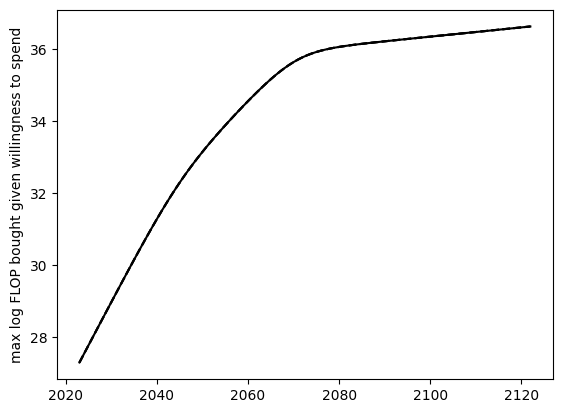

Year: 2023 - max log FLOP 27.3 (~2.0 octillion) 80% CI 27.3 (~2.0 octillion) - 27.3 (~2.0 octillion)
Year: 2024 - max log FLOP 27.5 (~3.5 octillion) 80% CI 27.5 (~3.5 octillion) - 27.5 (~3.5 octillion)
Year: 2025 - max log FLOP 27.8 (~6.0 octillion) 80% CI 27.8 (~6.0 octillion) - 27.8 (~6.0 octillion)
Year: 2026 - max log FLOP 28.0 (~10.4 octillion) 80% CI 28.0 (~10.4 octillion) - 28.0 (~10.4 octillion)
Year: 2027 - max log FLOP 28.3 (~18.1 octillion) 80% CI 28.3 (~18.1 octillion) - 28.3 (~18.1 octillion)
Year: 2028 - max log FLOP 28.5 (~31.5 octillion) 80% CI 28.5 (~31.5 octillion) - 28.5 (~31.5 octillion)
Year: 2029 - max log FLOP 28.7 (~54.5 octillion) 80% CI 28.7 (~54.5 octillion) - 28.7 (~54.5 octillion)
Year: 2030 - max log FLOP 29.0 (~94.4 octillion) 80% CI 29.0 (~94.4 octillion) - 29.0 (~94.4 octillion)
Year: 2031 - max log FLOP 29.2 (~163.3 octillion) 80% CI 29.2 (~163.3 octillion) - 29.2 (~163.3 octillion)
Year: 2032 - max log FLOP 29.5 (~282.0 octillion) 80% CI 29.5 (~282.0 

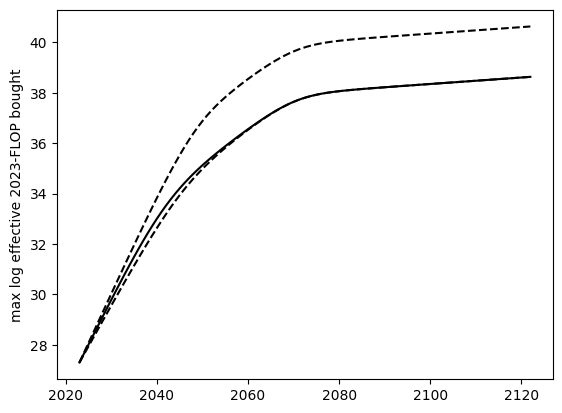

Year: 2023 - max log effective 2023-FLOP 27.3 (~2.0 octillion) 80% CI 27.3 (~2.0 octillion) - 27.3 (~2.0 octillion)
Year: 2024 - max log effective 2023-FLOP 27.7 (~4.5 octillion) 80% CI 27.6 (~4.2 octillion) - 27.7 (~4.9 octillion)
Year: 2025 - max log effective 2023-FLOP 28.0 (~10.3 octillion) 80% CI 27.9 (~8.8 octillion) - 28.1 (~12.0 octillion)
Year: 2026 - max log effective 2023-FLOP 28.4 (~23.4 octillion) 80% CI 28.3 (~18.6 octillion) - 28.5 (~29.5 octillion)
Year: 2027 - max log effective 2023-FLOP 28.7 (~53.3 octillion) 80% CI 28.6 (~39.2 octillion) - 28.9 (~72.5 octillion)
Year: 2028 - max log effective 2023-FLOP 29.1 (~121.0 octillion) 80% CI 28.9 (~82.4 octillion) - 29.2 (~177.8 octillion)
Year: 2029 - max log effective 2023-FLOP 29.4 (~273.4 octillion) 80% CI 29.2 (~173.3 octillion) - 29.6 (~435.9 octillion)
Year: 2030 - max log effective 2023-FLOP 29.8 (~615.0 octillion) 80% CI 29.6 (~363.3 octillion) - 30.0 (~1.1 nonillion)
Year: 2031 - max log effective 2023-FLOP 30.1 (~1

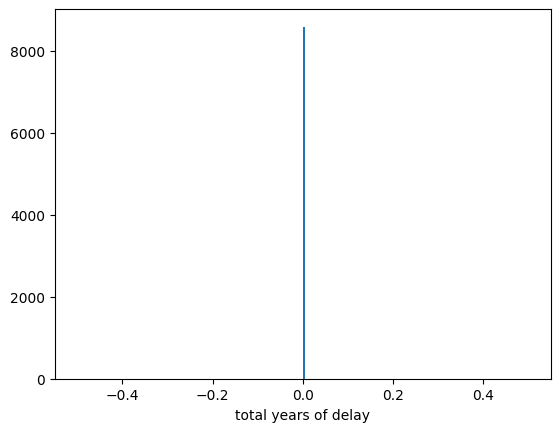

In [6]:
variables = VARIABLE_SETS['Cotra2022']
variables['RUNS'] = RUNS
variables['CURRENT_YEAR'] = CURRENT_YEAR
variables['MAX_YEAR'] = MAX_YEAR
run_timelines_model(variables, cores=5, runs=RUNS)

In [7]:
print('File last ran: {}'.format(dt.now()))

File last ran: 2024-03-15 12:27:27.531956
